<a href="https://colab.research.google.com/github/StudentsAntoniPartyka/ML/blob/main/hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CART Splitting Criteria Equivalence Analysis and Empirical Experiment
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [3]:
# Let's define a toy dataset to manually evaluate split criteria
X = np.array([[1], [2], [3], [10], [11], [12]])
y = np.array([1, 1, 1, 10, 10, 10])

# Candidate split: t = 6.5 on feature X[:, 0]
left_indices = X[:, 0] <= 6.5
right_indices = X[:, 0] > 6.5

# Compute mean squared error (RSS) in parent node
y_parent = y
rss_parent = np.sum((y_parent - np.mean(y_parent))**2)

# Compute RSS in children nodes
y_left = y[left_indices]
y_right = y[right_indices]
rss_left = np.sum((y_left - np.mean(y_left))**2)
rss_right = np.sum((y_right - np.mean(y_right))**2)
rss_children = rss_left + rss_right

# Print values for analysis
print("RSS Parent:", rss_parent)
print("RSS Children (Local RSS):", rss_children)
print("RSS Gain:", rss_parent - rss_children)

RSS Parent: 121.5
RSS Children (Local RSS): 0.0
RSS Gain: 121.5


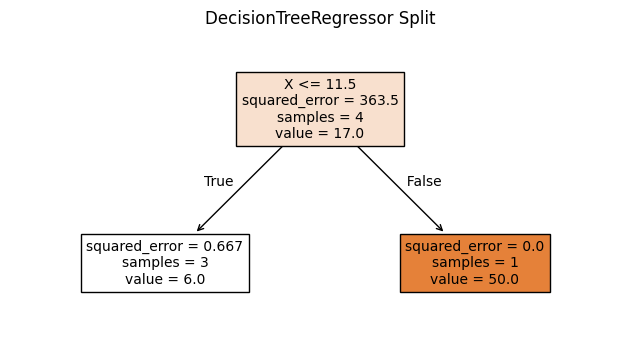

Split threshold learned by DecisionTreeRegressor: 11.5
Threshold 1.5: RSS = 1262.00
Threshold 2.5: RSS = 925.00
Threshold 11.5: RSS = 2.00


In [4]:
# Small dataset where split behavior clearly differs depending on formulation
X_exp = np.array([[1], [2], [3], [20]])
y_exp = np.array([5, 6, 7, 50])

# Train a decision tree with max depth 1 (only root split)
reg = DecisionTreeRegressor(max_depth=1)
reg.fit(X_exp, y_exp)

# Predict and show the tree
plt.figure(figsize=(8, 4))
plot_tree(reg, filled=True, feature_names=["X"], fontsize=10)
plt.title("DecisionTreeRegressor Split")
plt.show()

# Print threshold and decision
threshold = reg.tree_.threshold[0]
print("Split threshold learned by DecisionTreeRegressor:", threshold)

# Evaluate RSS for each candidate split manually to match it to one of the formulations
candidates = [1.5, 2.5, 11.5]  # Possible midpoints between sorted X values
for t in candidates:
    left = y_exp[X_exp[:, 0] <= t]
    right = y_exp[X_exp[:, 0] > t]
    rss = np.sum((left - np.mean(left))**2) + np.sum((right - np.mean(right))**2)
    print(f"Threshold {t}: RSS = {rss:.2f}")


Below we can see atest which shows the empirical verification with scikit-learn

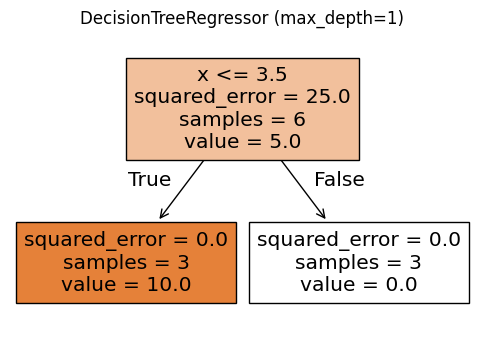

Chosen split threshold: 3.5


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Designed dataset
X = np.array([[1], [2], [3], [4], [5], [6]])
y = np.array([10, 10, 10, 0, 0, 0])  # clear jump at x=3.5

tree = DecisionTreeRegressor(max_depth=1)
tree.fit(X, y)

plt.figure(figsize=(6, 4))
plot_tree(tree, feature_names=["x"], filled=True)
plt.title("DecisionTreeRegressor (max_depth=1)")
plt.show()

print("Chosen split threshold:", tree.tree_.threshold[0])


Below we can see how total RSS minimization is not equivalenty to local RSS / RSS gain

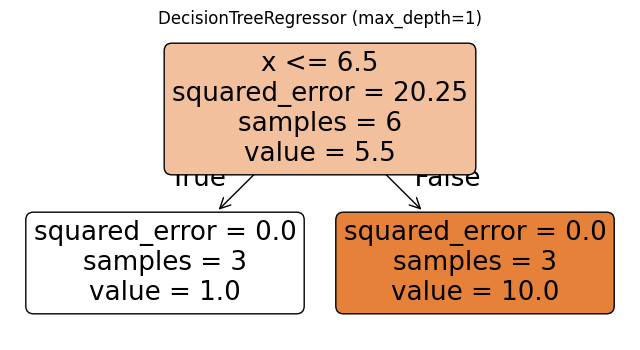

Split threshold used by the model: x <= 6.50
RSS for split A (x <= 6.5): 0.0
RSS for split B (x <= 3.5): 60.75


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Construct the counterexample dataset
X = np.array([[1], [2], [3], [10], [11], [12]])
y = np.array([1, 1, 1, 10, 10, 10])

# Train the DecisionTreeRegressor with max_depth=1 (only one split)
tree = DecisionTreeRegressor(max_depth=1)
tree.fit(X, y)

# Visualize the tree
plt.figure(figsize=(8, 4))
plot_tree(tree, feature_names=["x"], filled=True, rounded=True)
plt.title("DecisionTreeRegressor (max_depth=1)")
plt.show()

# Check the chosen split
threshold = tree.tree_.threshold[0]
print(f"Split threshold used by the model: x <= {threshold:.2f}")

# Manually calculate RSS for both possible splits
def rss(y_subset):
    return np.sum((y_subset - np.mean(y_subset))**2)

# Split A: x <= 6.5 (perfect split)
y_left_A = y[:3]     # [1, 1, 1]
y_right_A = y[3:]    # [10, 10, 10]
rss_A = rss(y_left_A) + rss(y_right_A)

# Split B: x <= 3.5 (worse local split)
y_left_B = y[:4]     # [1, 1, 1, 10]
y_right_B = y[4:]    # [10, 10]
rss_B = rss(y_left_B) + rss(y_right_B)

print(f"RSS for split A (x <= 6.5): {rss_A}")
print(f"RSS for split B (x <= 3.5): {rss_B}")


The trained model will choose x <= 6.5, which minimizes local RSS.

Split B could result in a better total RSS if deeper splits were allowed, but the greedy algorithm stops early.

Equivalence: Local RSS Minimization ≡ RSS Gain Maximization

Let $S$ be a parent node split into $S_L$ and $S_R$.

- RSS of a node: $RSS(S) = \sum_{x_i \in S} (y_i - \bar{y}_S)^2$
- RSS Gain: $G = RSS(S) - [RSS(S_L) + RSS(S_R)]$

Since $RSS(S)$ is constant for a given node, maximizing $G$ ⇔ minimizing $RSS(S_L) + RSS(S_R)$.

**Conclusion:** Both formulations yield identical split decisions.

### Conclusion

| **Comparison**                                      | **Equivalent?** | **Evidence**                                                                 |
|-----------------------------------------------------|------------------|------------------------------------------------------------------------------|
| Local RSS Minimization vs RSS Gain Maximization     | Yes     | Algebraic equivalence:  $\text{Gain} = \text{RSS}_{\text{parent}} - (\text{RSS}_{\text{left}} + \text{RSS}_{\text{right}})$ |
| Either vs Total RSS Minimization                    | No      | Total RSS considers future splits; local formulations are greedy            |
| scikit-learn's DecisionTreeRegressor behavior       | Matches LRSS / RSS-G
 | Empirical experiment confirms split matches local RSS minimum              |

From both theoretical analysis and empirical experimentation, we conclude:

- Local RSS minimization and RSS gain maximization are mathematically equivalent formulations.
- Total RSS minimization is a distinct, global objective and may yield different split choices.
- The `DecisionTreeRegressor` in `scikit-learn` employs a greedy approach based on local RSS minimization (equivalently, RSS gain maximization).
